In [278]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import scipy.stats as st
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer,f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import sklearn as sk

from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, recall_score

from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from scipy.stats import randint as sp_randInt
from sklearn.metrics import make_scorer, roc_auc_score, recall_score, matthews_corrcoef, balanced_accuracy_score, accuracy_score

import pickle

# Clasificacion

## Creacion de target

Para esta tarea se debe crear una nueva variable tipo_precio que tendrá tres categorías:
alto, medio, bajo.

In [279]:
ds_clasificacion_train = pd.read_csv("properati_argentina_train.csv")
ds_clasificacion_test = pd.read_csv("properati_argentina_test.csv")

ds_clasificacion_train.drop(columns="Unnamed: 0", inplace=True)
ds_clasificacion_test.drop(columns="Unnamed: 0", inplace=True)


Creo variable "precioxm2"

In [280]:
ds_clasificacion_train["precioxm2"] = (ds_clasificacion_train["property_price"]/ds_clasificacion_train["property_surface_total"]).round(2)
ds_clasificacion_test["precioxm2"] = (ds_clasificacion_test["property_price"]/ds_clasificacion_test["property_surface_total"]).round(2)

ds_clasificacion_train.head()

latitud   longitud  place_l3 property_type  property_rooms  \
0 -34.601807 -58.469965  Paternal  Departamento             2.0   
1 -34.580088 -58.424965   Palermo  Departamento             2.0   
2 -34.551481 -58.452358  Belgrano  Departamento             1.0   
3 -34.632290 -58.464844    Flores  Departamento             5.0   
4 -34.549279 -58.463074     Nuñez  Departamento             2.0   

   property_bedrooms  property_surface_total  property_surface_covered  \
0                1.0                    53.0                      49.0   
1                1.0                    35.0                      35.0   
2                1.0                    25.0                      20.0   
3                3.0                    75.0                      75.0   
4                1.0                    46.0                      34.0   

   property_price  precioxm2  
0         80000.0    1509.43  
1         79900.0    2282.86  
2         69000.0    2760.00  
3        150000.0    2000.00  
4         85000.0    1847.83

Grafico de densidad de precioxm2

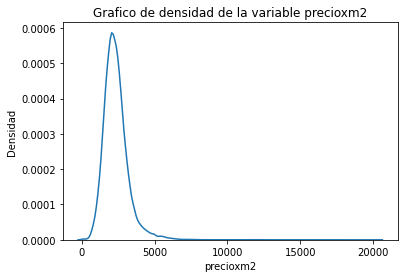

In [281]:
sns_hist = sns.kdeplot(data=ds_clasificacion_train['precioxm2']).set(title="Grafico de densidad de la variable precioxm2", xlabel="precioxm2", ylabel="Densidad")

Grafico la densidad de precioxm2 relativo al tipo de propiedad

In [282]:
densidad_depto = ds_clasificacion_train[ds_clasificacion_train["property_type"] == "Departamento"]["precioxm2"]
densidad_casa = ds_clasificacion_train[ds_clasificacion_train["property_type"] == "Casa"]["precioxm2"]
densidad_ph = ds_clasificacion_train[ds_clasificacion_train["property_type"] == "PH"]["precioxm2"]
sns.kdeplot(data=densidad_ph, label = "PH")
sns.kdeplot(data=densidad_depto, label="Departamento")
sns.kdeplot(data=densidad_casa, label="Casa")
plt.legend(bbox_to_anchor=(0.5, 0, 0.5, 1), fontsize=10)
plt.title("Densidad del precioxm2 relativo al tipo de propiedad")

Text(0.5, 1.0, 'Densidad del precioxm2 relativo al tipo de propiedad')

#### Igual Frecuencia

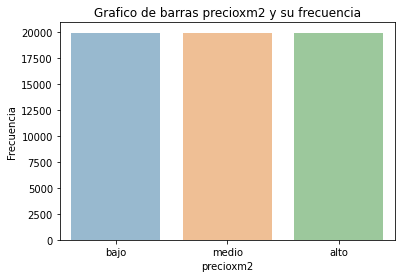

In [283]:
labels=["bajo","medio","alto"]

ds_clasificacion_train["precioxm2_igual_frec"] = pd.qcut(ds_clasificacion_train["precioxm2"],q=3, labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion_train.groupby(['precioxm2_igual_frec']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="Grafico de barras precioxm2 y su frecuencia",ylabel='Frecuencia',xlabel='precioxm2')
plt.show()

#### Por cuantiles

In [284]:
labels=["bajo","medio","alto"]
ds_clasificacion_train["precioxm2_q"] = pd.qcut(ds_clasificacion_train["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2 = ds_clasificacion_train.groupby(['precioxm2_q']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   ## Declaramos valores para el eje x
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="Grafico de barras precioxm2 por cuantiles y su frecuencia",ylabel='Frecuencia',xlabel='precioxm2')
plt.show()

#### Por viviendas

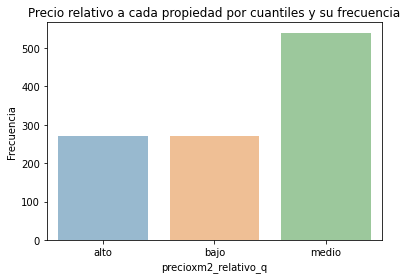

In [285]:

def aplicar_opcion_3(dataset):

    dataset["precioxm2_relativo_q"] = np.nan
    labels=["bajo","medio","alto"]

    #Casa
    dataset.loc[dataset["property_type"] == "Casa", "precioxm2_relativo_q"]=pd.qcut(dataset[dataset["property_type"] == "Casa"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

    #Departamento
    dataset.loc[dataset["property_type"] == "Departamento", "precioxm2_relativo_q"]=pd.qcut(dataset[dataset["property_type"] == "Departamento"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)

    #PH
    dataset.loc[dataset["property_type"] == "PH", "precioxm2_relativo_q"]=pd.qcut(dataset[dataset["property_type"] == "PH"]["precioxm2"],q=[0,0.25,0.75,1], labels=labels)


aplicar_opcion_3(ds_clasificacion_train)

#Gráfico de barras con Seaborn
ds_agrupado_precioxm2=ds_clasificacion_train[ds_clasificacion_train["property_type"] == "Casa"].groupby(['precioxm2_relativo_q']).count()  #Calculo la frecuencia de cada categoría

eje_x = ds_agrupado_precioxm2.index.tolist()   
eje_y = ds_agrupado_precioxm2['precioxm2'].tolist()  

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_precioxm2 ,alpha=0.5).set(title="Precio relativo a cada propiedad por cuantiles y su frecuencia",ylabel='Frecuencia',xlabel='precioxm2_relativo_q')
plt.show()

In [286]:
ds_clasificacion_train.head()

latitud   longitud  place_l3 property_type  property_rooms  \
0 -34.601807 -58.469965  Paternal  Departamento             2.0   
1 -34.580088 -58.424965   Palermo  Departamento             2.0   
2 -34.551481 -58.452358  Belgrano  Departamento             1.0   
3 -34.632290 -58.464844    Flores  Departamento             5.0   
4 -34.549279 -58.463074     Nuñez  Departamento             2.0   

   property_bedrooms  property_surface_total  property_surface_covered  \
0                1.0                    53.0                      49.0   
1                1.0                    35.0                      35.0   
2                1.0                    25.0                      20.0   
3                3.0                    75.0                      75.0   
4                1.0                    46.0                      34.0   

   property_price  precioxm2 precioxm2_igual_frec precioxm2_q  \
0         80000.0    1509.43                 bajo        bajo   
1         79900.0    2282.86                medio       medio   
2         69000.0    2760.00                 alto        alto   
3        150000.0    2000.00                medio       medio   
4         85000.0    1847.83                 bajo       medio   

  precioxm2_relativo_q  
0                 bajo  
1                medio  
2                medio  
3                medio  
4                 bajo

#### Seleccion de alternativa

Opcion 1:
- Por lo que podemos observar en los graficos, al distribucion del precioxm2 no es para todas las pripiedades iguales, por lo que la opcion 1 esta descartada

Opcion 2:
- Si bien separarlos como indica la opcion es una mejora respecto a la opcion 1, sigue siendo una opcion incompleta, dado que separarlos por tipo de propieda primero seria una mejor opcion.

Opcion 3:
- Elegimos esta opcion, dado a que se esta separando por propiedades en quantiles y a la vez por por propiedad, observando los graficos de densidad, podemos observar que cada propiedad tiene una distribucion de precioxm2 significativamente distinta. 

#### Grafico sobre mapa de Caba

In [287]:
import geopandas
from shapely.geometry import Point

ds_mapa_point = geopandas.GeoDataFrame(ds_clasificacion_train, geometry=geopandas.points_from_xy(ds_clasificacion_train.longitud, ds_clasificacion_train.latitud))
ds_mapa_capital = geopandas.read_file("barrios_2/barrios-polygon.shp")

In [288]:
ds_clasificacion_train.loc[ds_clasificacion_train['precioxm2_q'] == "bajo",'color'] = 1
ds_clasificacion_train.loc[ds_clasificacion_train['precioxm2_q'] == "medio",'color'] = 2
ds_clasificacion_train.loc[ds_clasificacion_train['precioxm2_q'] == "alto",'color'] = 3

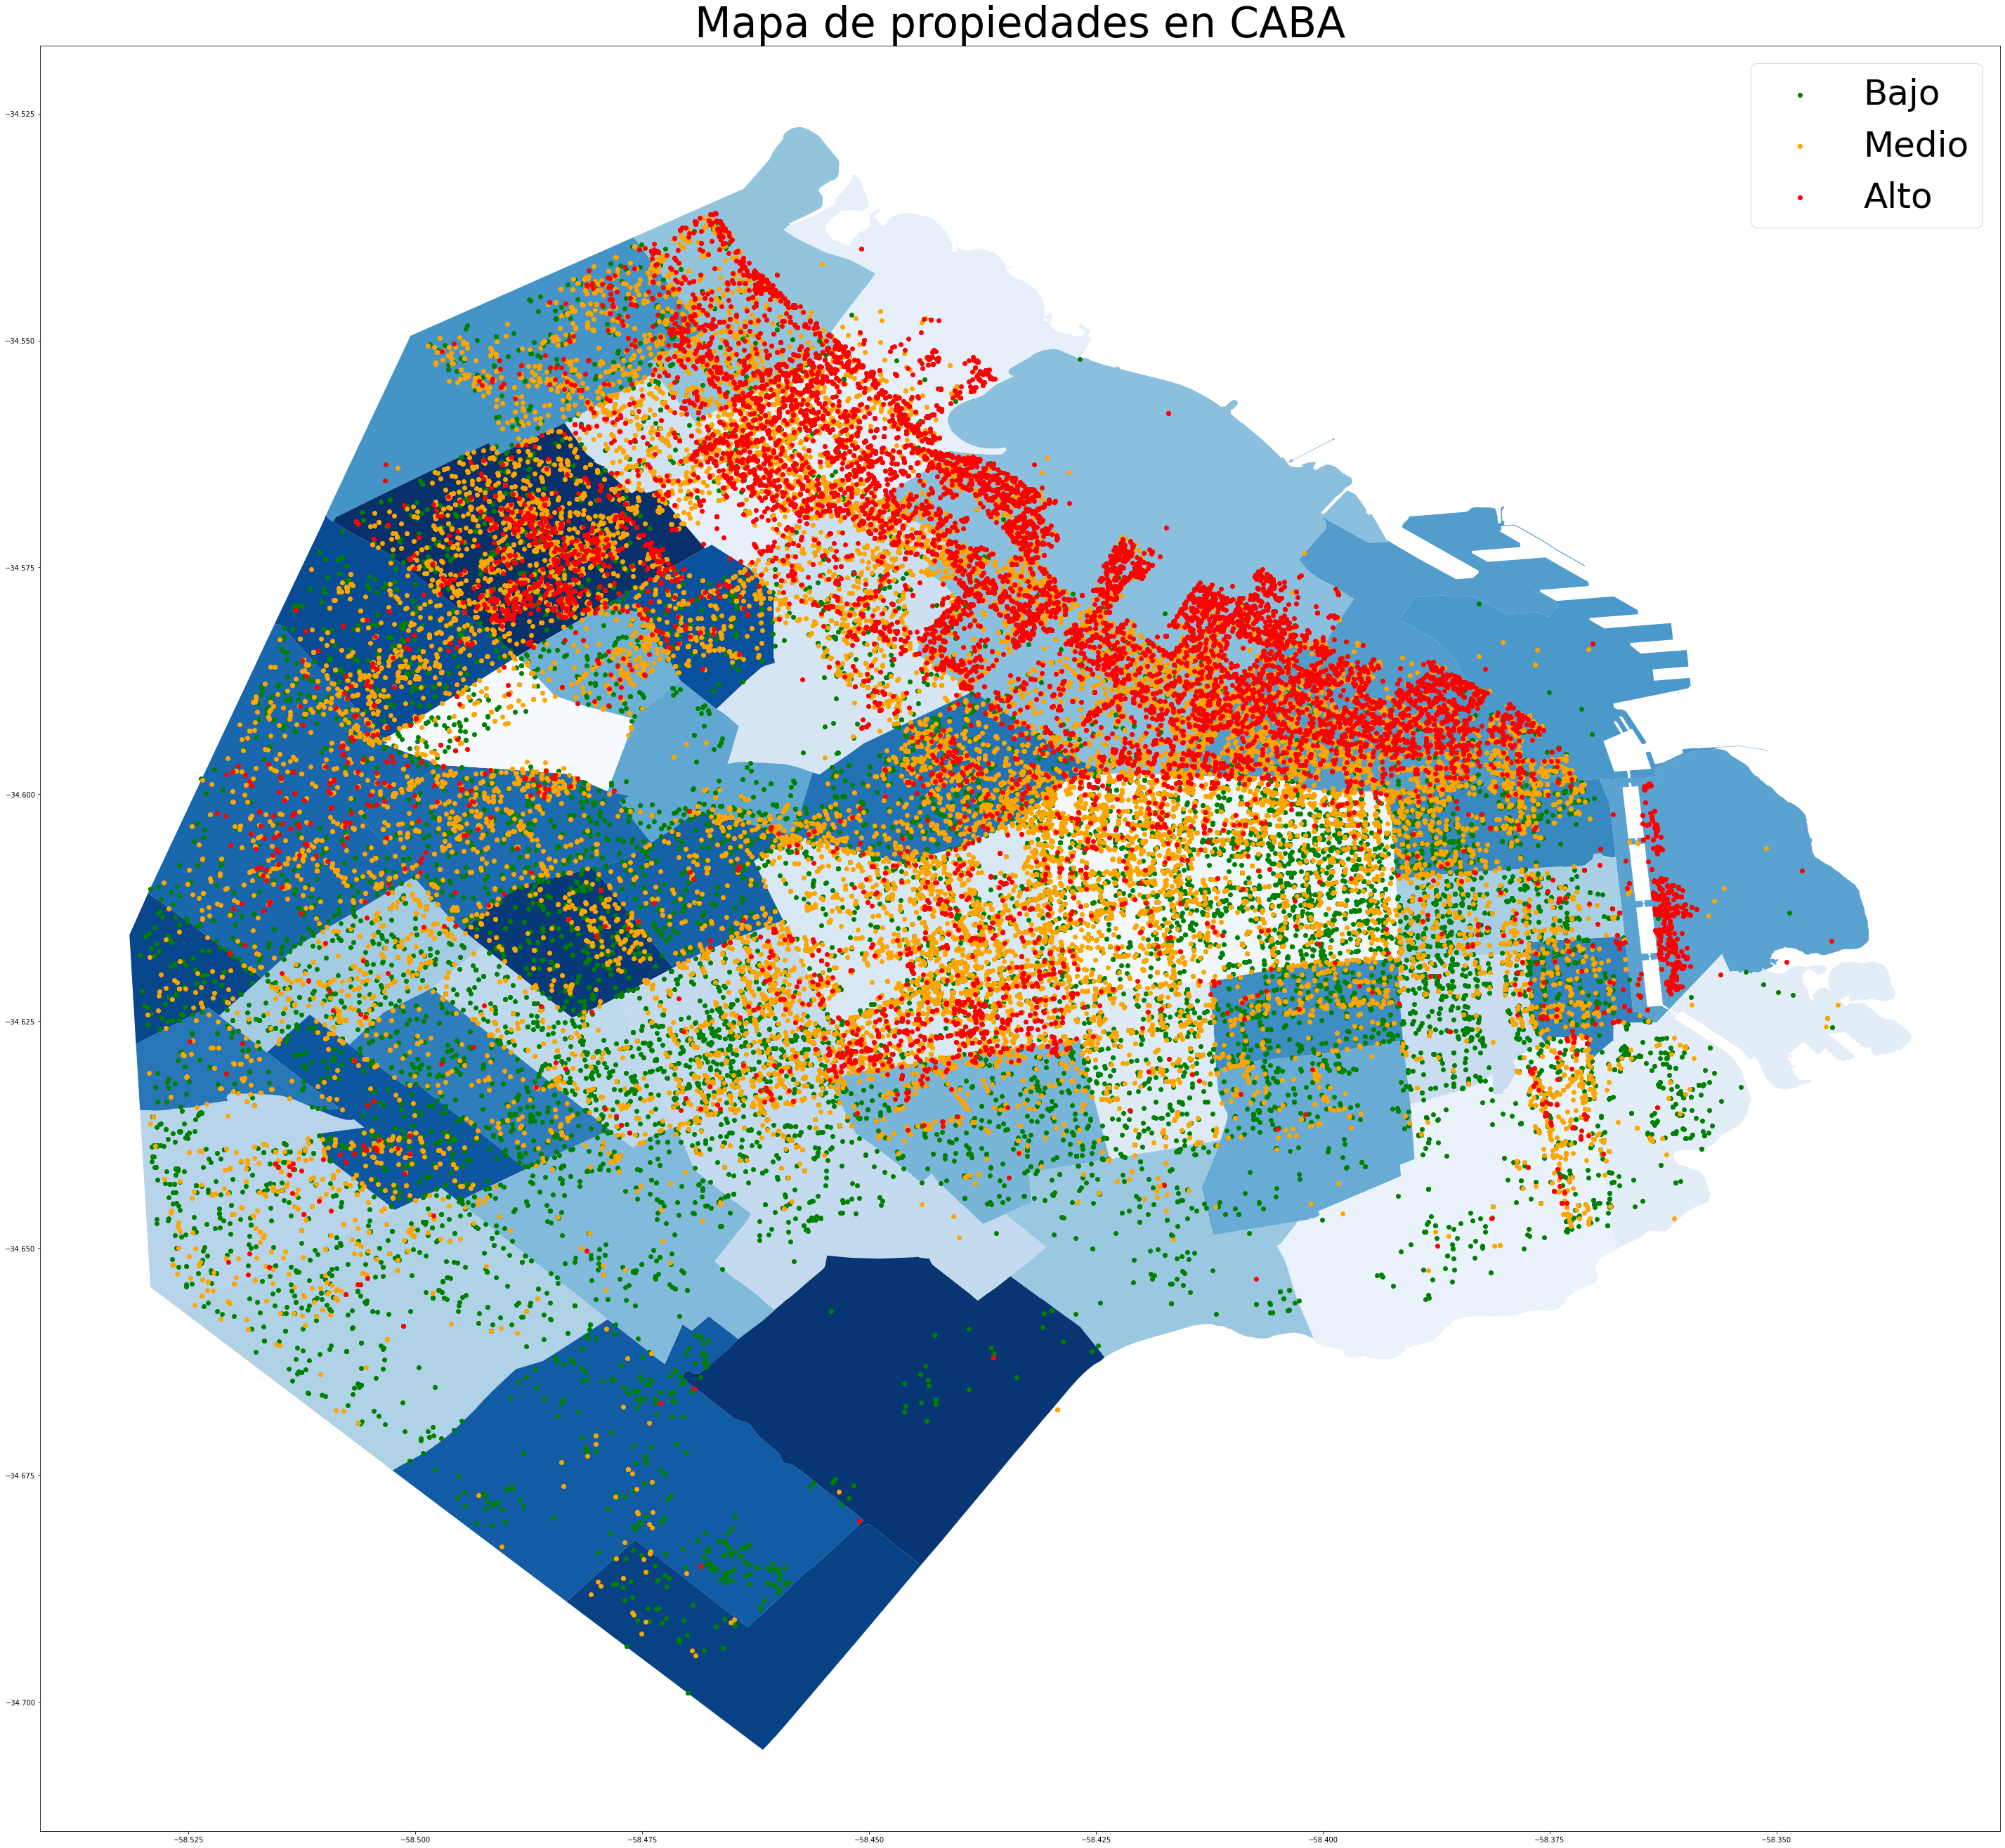

In [289]:

fig,ax = plt.subplots(figsize = (50,50))
ds_mapa_capital.plot(ax = ax, column = "BARRIO", cmap = "Blues")
ds_mapa_point[ds_mapa_point["color"] == 1].plot(ax = ax, color = "green",label="Bajo")
ds_mapa_point[ds_mapa_point["color"] == 2].plot(ax = ax, color = "orange", label = "Medio") 
ds_mapa_point[ds_mapa_point["color"] == 3].plot(ax = ax, color = "red", label="Alto") 
ax.set_title("Mapa de propiedades en CABA", fontdict = {"fontsize" : "60"})
plt.rc('legend', fontsize=50)
plt.legend()
plt.show()

- Como podemos observar, las viviendas de mayor valor, tipo precio "Alto" se ubican en la zona este/norte de la ciudad, lo que es bastante coincidente a la realidad.
- Las propiedades Amarillas que son caracterizadas como tipo precio "Medio", se encuentran distribuidos con mayor frecuencia en barrios como Almagro, Caballito, Villa Urquiza, llegando a compartir franja con las popiedades de color Rojo por barrios de Palermo, Recoleta y Belgrano.
- Finalmente las popiedades de tipo precio "Bajo" que se encuentran distribuidas sobre todo el limite con Provincia de Buenos aires, hasta cierto punto son como la "ultima capa".

# Entrenamiento y Predicción

### Preparo los datasets

#### Datasets completos

In [290]:
#aplico la alternativa seleccionada al dataset de testeo
aplicar_opcion_3(ds_clasificacion_test)

#elimino columnas 
columnas_a_eliminar_train = ["precioxm2_igual_frec", "precioxm2_q", "color", "geometry", "property_price", "precioxm2", "place_l3"]
columnas_a_eliminar_test = ["place_l3", "property_price", "precioxm2"]

#Datasets que utilizamos a lo largo del punto
ds_train = ds_clasificacion_train.drop(columns = columnas_a_eliminar_train)
ds_test = ds_clasificacion_test.drop(columns = columnas_a_eliminar_test)

Predeciccion del valor del atributo tipo_precio,

In [291]:
ds_train.head()

latitud   longitud property_type  property_rooms  property_bedrooms  \
0 -34.601807 -58.469965  Departamento             2.0                1.0   
1 -34.580088 -58.424965  Departamento             2.0                1.0   
2 -34.551481 -58.452358  Departamento             1.0                1.0   
3 -34.632290 -58.464844  Departamento             5.0                3.0   
4 -34.549279 -58.463074  Departamento             2.0                1.0   

   property_surface_total  property_surface_covered precioxm2_relativo_q  
0                    53.0                      49.0                 bajo  
1                    35.0                      35.0                medio  
2                    25.0                      20.0                medio  
3                    75.0                      75.0                medio  
4                    46.0                      34.0                 bajo

In [292]:
ds_train.shape

(59851, 8)

In [293]:
ds_test.head()

latitud   longitud property_type  property_rooms  property_bedrooms  \
0 -34.598679 -58.499717  Departamento             1.0                1.0   
1 -34.574987 -58.420611  Departamento             2.0                1.0   
2 -34.586527 -58.398279  Departamento             2.0                1.0   
3 -34.577647 -58.406064  Departamento             4.0                3.0   
4 -34.560998 -58.464248  Departamento             1.0                1.0   

   property_surface_total  property_surface_covered precioxm2_relativo_q  
0                    38.0                      28.0                medio  
1                   150.0                      70.0                 alto  
2                    43.0                      41.0                medio  
3                   130.0                     118.0                 alto  
4                    33.0                      29.0                 alto

In [294]:
ds_test.shape

(16262, 8)

Feature engineering

In [295]:
ds_train = pd.get_dummies(ds_train, columns=["property_type"], drop_first=True)
ds_test =  pd.get_dummies(ds_test, columns=["property_type"], drop_first=True)

In [296]:
columnas_elegidas = ['property_rooms', 'property_bedrooms', 'property_surface_total', "property_surface_covered"]
sc = StandardScaler()

#estandarizo variables cuantitativas en train
x = ds_train.loc[:, columnas_elegidas].values
x = sc.fit_transform(x)
ds_train[columnas_elegidas] = x 

#estandarizo variables cuantitativas en test
y = ds_test.loc[:, columnas_elegidas].values
y = sc.transform(y)
ds_test[columnas_elegidas] = y


In [297]:
ds_train.head()

latitud   longitud  property_rooms  property_bedrooms  \
0 -34.601807 -58.469965       -0.575301          -0.904778   
1 -34.580088 -58.424965       -0.575301          -0.904778   
2 -34.551481 -58.452358       -1.459566          -0.904778   
3 -34.632290 -58.464844        2.077491           1.413169   
4 -34.549279 -58.463074       -0.575301          -0.904778   

   property_surface_total  property_surface_covered precioxm2_relativo_q  \
0               -0.357417                 -0.422278                 bajo   
1               -0.614211                 -0.774079                medio   
2               -0.756875                 -1.151008                medio   
3               -0.043558                  0.231066                medio   
4               -0.457282                 -0.799207                 bajo   

   property_type_Departamento  property_type_PH  
0                           1                 0  
1                           1                 0  
2                           1                 0  
3                           1                 0  
4                           1                 0

#### Datasets reducidos

In [298]:
ds_reducido_train = pd.read_csv("properati_argentina_reducido_train.csv")
ds_reducido_test = pd.read_csv("properati_argentina_reducido_test.csv")

columnas_a_eliminar = ["Unnamed: 0", "target"]

#datasets reducidos que utilizaremos a lo largo del punto
ds_reducido_train.drop(columns=columnas_a_eliminar, inplace=True)
ds_reducido_test.drop(columns=columnas_a_eliminar, inplace=True)

agregamos las columnas de precioxm2_relativo_q

In [299]:
ds_reducido_train["precioxm2_relativo_q"] = ds_clasificacion_train["precioxm2_relativo_q"]
ds_reducido_test["precioxm2_relativo_q"] = ds_clasificacion_test["precioxm2_relativo_q"]

In [300]:
ds_reducido_train.head()

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6  \
0 -1.203931 -0.275293  0.413176  0.281218 -0.653813  0.322816   
1 -1.556395  0.103435  0.233243 -0.015272  0.565592 -0.188810   
2 -2.230063 -0.194028  1.526780 -0.091470  0.809760 -0.160262   
3  1.678872  0.694012 -0.608398  0.044571 -2.015136 -0.732341   
4 -1.511679  0.021077  1.780005 -0.186017  0.574209 -0.148672   

  precioxm2_relativo_q  
0                 bajo  
1                medio  
2                medio  
3                medio  
4                 bajo

In [301]:
ds_reducido_train.shape

(59851, 7)

In [302]:
ds_reducido_test.head()

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6  \
0 -1.929369 -0.804080  1.013857  0.439801 -1.022326  0.473829   
1 -0.541420  0.610849  0.419845 -0.120826  1.027665  1.180578   
2 -1.466170  0.323500 -0.402106 -0.035474  0.925898 -0.128228   
3  1.880221  1.721686  0.019769 -0.542067  0.537791 -0.350747   
4 -2.051494 -0.281035  1.471585  0.015723  0.419219  0.040986   

  precioxm2_relativo_q  
0                medio  
1                 alto  
2                medio  
3                 alto  
4                 alto

In [303]:
ds_reducido_test.shape

(16262, 7)

## Arbol de decision

In [304]:
features_normal = ["latitud", "longitud", 'property_rooms', 'property_bedrooms', 'property_surface_total', "property_surface_covered", "property_type_Departamento", "property_type_PH"]

features_reducido = ["cp_1", "cp_2", "cp_3", "cp_4", "cp_5", "cp_6"]

target = ["precioxm2_relativo_q"]

In [305]:
#Verifico balanceo de clases
ds_train[target].value_counts(normalize=True)*100 

precioxm2_relativo_q
medio                   49.945698
bajo                    25.055555
alto                    24.998747
dtype: float64

Si bien los arboles de decision no son normalmente afectados por clases desbalanceadas, es importante tenerlo en cuenta para otros algoritmos de clasificacion

In [306]:
#train
x_train =ds_train[features_normal]
y_train = ds_train[target]

#test
x_test= ds_test[features_normal]
y_test= ds_test[target]

In [307]:
#train reducido
x_train_reducido = ds_reducido_train[features_reducido]
y_train_reducido =  ds_reducido_train[target]

#test reducido
x_test_reducido = ds_reducido_test[features_reducido]
y_test_reducido =  ds_reducido_test[target]

#### Optimizacion de hiperparametros

In [308]:
def optimizar_parametros(ds_train_x, ds_train_y):
    #Cantidad de combinaciones que quiero porbar
    n=10 

    #Conjunto de parámetros que quiero usar
    params_grid = {'criterion':['gini','entropy'],
                'min_samples_leaf':list(range(1,10)),
                'min_samples_split': list(range(12,20)),
                'ccp_alpha':np.linspace(0.001,0.005,n), 
                'max_depth':list(range(5,6))}
                    
    #Cantidad de splits para el Cross Validation
    folds=10

    #Kfold estratificado
    kfoldcv = StratifiedKFold(n_splits=folds)

    #Clasificador
    base_tree = DecisionTreeClassifier() 

    #Metrica que quiero optimizar F1 Score
    scorer_fn = make_scorer(f1_score, average='micro')

    """
    scoring = { 'accuracy' : make_scorer(accuracy_score, avarage="micro"), 
                'precision' : make_scorer(precision_score, avarage="micro"),
                'recall' : make_scorer(recall_score, avarage="micro"), 
                'f1' : make_scorer(sk.metrics.f1_score, average="micro")
                }
    """

    #Random Search Cross Validation
    randomcv = RandomizedSearchCV(estimator=base_tree,
                                param_distributions = params_grid,
                                scoring=scorer_fn,
                                cv=kfoldcv,
                                n_iter=n,
                                random_state=1) 


    return randomcv.fit(ds_train_x,ds_train_y)

randomcv_normal = optimizar_parametros(x_train, y_train)
randomcv_reducido = optimizar_parametros(x_train_reducido, y_train_reducido)

 - Utilizamos Random Serch con 10 combinaciones totales
 - Para k-fold utilizamos 10 folds
 - Para buscar los parametros consideramos utilizar f1-score como metrica


In [309]:
#Mejores hiperparametros del arbol
print("Para el dataset completo, obtuvimos que los mejores hiperparametros del arbol son: " + str(randomcv_normal.best_params_))
#Mejor métrica
print("Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: " + str(randomcv_normal.best_score_))


Para el dataset completo, obtuvimos que los mejores hiperparametros del arbol son: {'min_samples_split': 15, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0014444444444444444}
Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: 0.5760472626046685


In [310]:
#Mejores hiperparametros del arbol
print("Para el dataset reducido, obtuvimos que los mejores hiperparametros del arbol son: " + str(randomcv_reducido.best_params_))
#Mejor métrica
print("Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: " + str(randomcv_reducido.best_score_))


Para el dataset reducido, obtuvimos que los mejores hiperparametros del arbol son: {'min_samples_split': 13, 'min_samples_leaf': 8, 'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.001}
Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: 0.5636998164193198


Podemos observar como los f1-score de ambos datasets, el reducido y el normal son casi iguales, esto nos indica que la reduccion de la dimension fue util.
Con menos variables, podemos predecir con casi la misma exactitud

Observbamos que variables fueron mas importantes

In [311]:
#Atributos considerados y su importancia
best_tree_normal = randomcv_normal.best_estimator_
feat_imps_normal = best_tree_normal.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps_normal,features_normal)):
  print('{}: {}'.format(feat,feat_imp))

property_bedrooms: 0.0
property_rooms: 0.0
property_surface_covered: 0.0
property_type_PH: 0.0
property_type_Departamento: 0.02356294831981477
property_surface_total: 0.024139367136746574
longitud: 0.25565986317638073
latitud: 0.6966378213670579


In [312]:
#Atributos considerados y su importancia
best_tree_reducido = randomcv_reducido.best_estimator_
feat_imps_reducido = best_tree_reducido.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps_reducido,features_reducido)):
  print('{}: {}'.format(feat,feat_imp))

cp_1: 0.0
cp_4: 0.046907113124953846
cp_6: 0.07845445631216859
cp_2: 0.09196991186175645
cp_3: 0.3642067248933169
cp_5: 0.4184617938078041


Creo el árbol con los mejores hiperparámetros

In [313]:
def crear_arbol_ideal(random_cv, ds_train_x, ds_train_y, features_param):
    
    arbol = DecisionTreeClassifier().set_params(**random_cv.best_params_)

    #Entreno el arbol en todo el set
    arbol.fit(ds_train_x, ds_train_y)

    return export_text(arbol, feature_names=list(features_param)), arbol

reglas_normal, arbol_normal = crear_arbol_ideal(randomcv_normal, x_train, y_train, features_normal)

reglas_reducido, arbol_reducido = crear_arbol_ideal(randomcv_reducido, x_train_reducido, y_train_reducido, features_reducido)

Imprimo reglas que toma el arbol para clasificar una instancia creado con el dataset completo

In [314]:
print(reglas_normal)

|--- latitud <= -34.60
|   |--- longitud <= -58.37
|   |   |--- longitud <= -58.42
|   |   |   |--- latitud <= -34.63
|   |   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |   |--- class: medio
|   |   |   |   |--- property_type_Departamento >  0.50
|   |   |   |   |   |--- class: bajo
|   |   |   |--- latitud >  -34.63
|   |   |   |   |--- longitud <= -58.46
|   |   |   |   |   |--- class: medio
|   |   |   |   |--- longitud >  -58.46
|   |   |   |   |   |--- class: medio
|   |   |--- longitud >  -58.42
|   |   |   |--- property_surface_total <= -0.58
|   |   |   |   |--- class: medio
|   |   |   |--- property_surface_total >  -0.58
|   |   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |   |--- class: medio
|   |   |   |   |--- property_type_Departamento >  0.50
|   |   |   |   |   |--- class: bajo
|   |--- longitud >  -58.37
|   |   |--- latitud <= -34.63
|   |   |   |--- class: bajo
|   |   |--- latitud >  -34.63
|   |   |   |--- class: alto
|--- 

Vemos que coincidentemente con la importancia de atributos, en ningun momento utiliza las variables property_bedrooms, property_rooms, property_surface_covered o property_type_PH

In [315]:
print(reglas_reducido)

|--- cp_3 <= -0.92
|   |--- cp_5 <= 0.78
|   |   |--- cp_5 <= 0.45
|   |   |   |--- cp_3 <= -1.07
|   |   |   |   |--- cp_2 <= -2.76
|   |   |   |   |   |--- class: bajo
|   |   |   |   |--- cp_2 >  -2.76
|   |   |   |   |   |--- class: bajo
|   |   |   |--- cp_3 >  -1.07
|   |   |   |   |--- cp_5 <= -0.21
|   |   |   |   |   |--- class: medio
|   |   |   |   |--- cp_5 >  -0.21
|   |   |   |   |   |--- class: bajo
|   |   |--- cp_5 >  0.45
|   |   |   |--- cp_2 <= 1.19
|   |   |   |   |--- cp_2 <= -3.10
|   |   |   |   |   |--- class: medio
|   |   |   |   |--- cp_2 >  -3.10
|   |   |   |   |   |--- class: bajo
|   |   |   |--- cp_2 >  1.19
|   |   |   |   |--- cp_3 <= -1.61
|   |   |   |   |   |--- class: alto
|   |   |   |   |--- cp_3 >  -1.61
|   |   |   |   |   |--- class: bajo
|   |--- cp_5 >  0.78
|   |   |--- cp_2 <= 0.47
|   |   |   |--- cp_6 <= 0.21
|   |   |   |   |--- class: medio
|   |   |   |--- cp_6 >  0.21
|   |   |   |   |--- cp_2 <= 0.16
|   |   |   |   |   |--- class:

#### Grafico el arbol

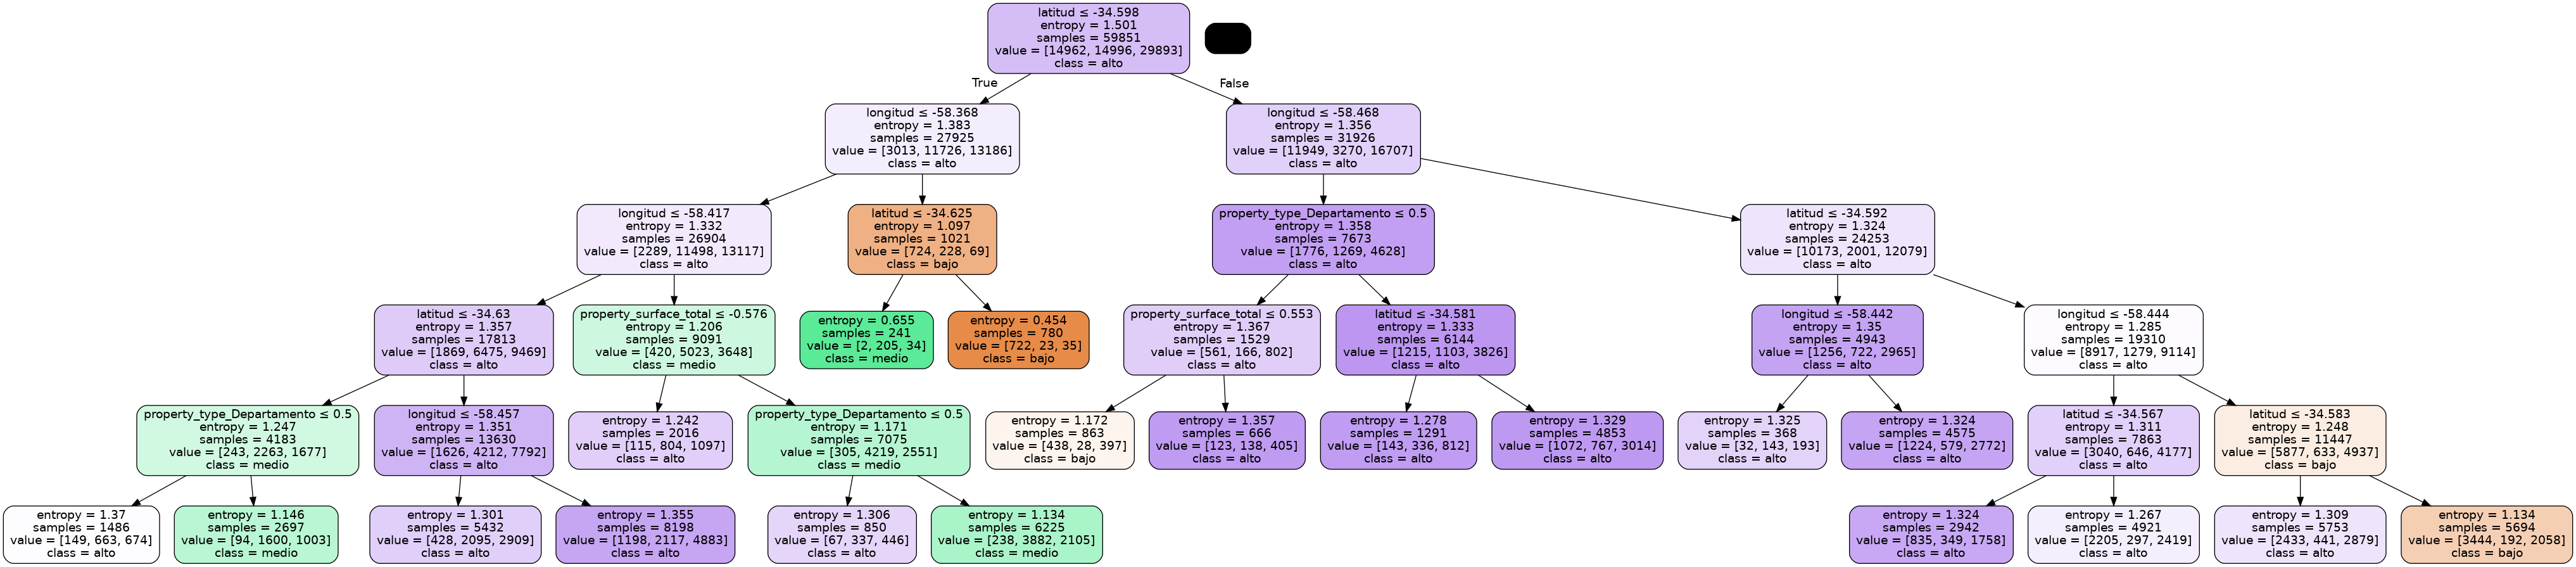

In [316]:
dot_data = StringIO()
export_graphviz(arbol_normal, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features_normal,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Explicacion

Explicacion de como se clasifica una instancia:

- A partir del Nodo raiz, buscamos la hoja mas cercana y nos dirijimos a ella
- En el nodo raiz, la primer variable que elije para separar es "Latitud", si miramos la importancia de las variables mas arriba, veremos que latitud tiene una importancia de 0.6966, la mas alta. Si la longotud de la instancia que esta calificando es menor o igual a -34.598 la instancia ira a la izquierda. De otra manera se ira a la derecha. (Suponemos que la latitud si era menor, nos movemos a la izquierda)
- Segunda pregunta que hace para calificar es si la "Longitud" es menor a igual a -58.368 (suponemos que nos movemos a la derecha)
- En este ultimo nodo, antes de coonvertirse en hoja (pasar a decidir a que clase pertenece el registro, si Alta, Media o Baja) pregunta si la Latitud es menor a igual a -34.625, si lo es clasifica a la instancia como tipo_precio = "Medio" de lo contrario la califica como "Bajo"
- Y asi repite estos pasos con todos las instancias, hasta que las califica.


Notar que cuanto mas naranja es el nodo, mas seguro esta de la decision que va a tomar.
El ultimo nodo que tomamos que tomamos tiene [722, 23, 35], 722 clase = Baja, 23 = clase media y 35 clase = alta. Ver que su color es bastante naranja.


#### Evaluo

Dataset normal

In [317]:
#Evalúo el Arbol con los mejores hiperparámetros

#Hago predicción sobre el set de evaluacion
y_pred = arbol_normal.predict(x_test)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test,y_pred))
print('F1-Score de la prdiccion sobre el set de evaluacion del dataset normal es: {}'.format(f1_score(y_test, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

              precision    recall  f1-score   support

        alto       0.63      0.30      0.40      4063
        bajo       0.61      0.37      0.46      4067
       medio       0.56      0.81      0.66      8132

    accuracy                           0.57     16262
   macro avg       0.60      0.49      0.51     16262
weighted avg       0.59      0.57      0.55     16262

F1-Score de la prdiccion sobre el set de evaluacion del dataset normal es: 0.5734227032345345


Text(33.0, 0.5, 'True')

- Como podemos observar, el F1-score en datos de entrenamiento es similar al F1-score con datos nuevos, esto es un buen indicio que el modelo no esta overfiteado.
- Notar que las clases clasificadas con el recall y f1-score mas bajo son los labels "alto" y "bajo", esto puede estar producido por el desbalanceamiento de datos que indicamos al principio.
- Mientras que el label "medio" es el mejor en ambas metricas. Y coincidentemente el que mas cantidad de registros con este label en el dataset

Dataset reducido

              precision    recall  f1-score   support

        alto       0.56      0.29      0.38      4063
        bajo       0.59      0.47      0.52      4067
       medio       0.56      0.76      0.65      8132

    accuracy                           0.57     16262
   macro avg       0.57      0.50      0.52     16262
weighted avg       0.57      0.57      0.55     16262

F1-Score de la prdiccion sobre el set de evaluacion del dataset normal es: 0.5673963842085844


Text(33.0, 0.5, 'True')

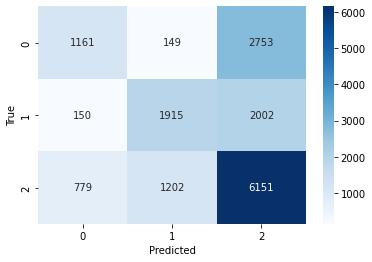

In [318]:
#Evalúo el Arbol con los mejores hiperparámetros

#Hago predicción sobre el set de evaluacion
y_pred = arbol_reducido.predict(x_test_reducido)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test_reducido,y_pred))
print('F1-Score de la prdiccion sobre el set de evaluacion del dataset normal es: {}'.format(f1_score(y_test_reducido, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test_reducido, y_pred, labels=arbol_reducido.classes_)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Al igual que arriba:

- Podemos ver que con los datos de testeo el f1-score es muy parecido a lo que dio en los datos de entrenamiento. Esto es un indicio que el modelo no se overfiteo
- Notar que las clases clasificadas con el recall y f1-score mas bajo son los labels "alto" y "bajo", esto puede estar producido por el desbalanceamiento de datos que indicamos al principio.
- Mientras que el label "medio" es el mejor en ambas metricas. Y coincidentemente el que mas cantidad de registros con este label en el dataset

Conlusiones comparaciones


- Igualmente, aunque el modelo entrenado con el dataset reducido haya tenido metricas muy parecidas al modelo entrenado con el dataset original,su f1-score sigue siendo un poco inferior 
- Por lo que si se eligiera uno seria el arbol entrenado con el dataset original.

Persistimos el modelo


In [322]:

#filename = "arbol_decision_model_reducido.sav"
#pickle.dump(arbol_reducido, open(filename, 'wb'))

#filename = "arbol_decision_model_normal.sav"
#pickle.dump(arbol_normal, open(filename, 'wb'))


# Random Forest


### Optimizacion de parametros

In [323]:
def optimizar_parametros_rf(ds_train_x, ds_train_y):
    
    #Cantidad de combinaciones que quiero porbar
    n=10


    param_grid_rf = {'criterion':['gini','entropy'],
                'min_samples_leaf':list(range(1,10)),
                'min_samples_split': list(range(12,20)),
                'ccp_alpha':np.linspace(0.001,0.005,n), 
                'max_depth':list(range(5,6))}

    #Cantidad de splits para el Cross Validation
    folds=10

    #Kfold estratificado
    kfoldcv = StratifiedKFold(n_splits=folds)

    #Clasificador
    base_tree_rf = RandomForestClassifier()#n_estimators=648


    #Metrica que quiero optimizar F1 Score
    scorer_fn = make_scorer(f1_score, average='micro')

    randomcv_rf = RandomizedSearchCV(   estimator=base_tree_rf,
                                        param_distributions = param_grid_rf,
                                        cv=kfoldcv,
                                        scoring = scorer_fn,
                                        n_jobs=-1)

    return randomcv_rf.fit(ds_train_x, ds_train_y)



randomcv_rf_normal = optimizar_parametros_rf(x_train, y_train)
randomcv_rf_reducido = optimizar_parametros_rf(x_train_reducido, y_train_reducido)

/home/fanu/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/home/fanu/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


 - Utilizamos Random serch con 10 combinaciones
 - Para k-fold utilizamos 10 folds
 - Para buscar los parametros consideramos la metrica f1-score

In [324]:
#Mejores hiperparametros del arbol
print("Para el dataset completo, obtuvimos que los mejores hiperparametros del arbol son: " + str(randomcv_rf_normal.best_params_))
#Mejor métrica
print("Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: " + str(randomcv_rf_normal.best_score_))

Para el dataset completo, obtuvimos que los mejores hiperparametros del arbol son: {'min_samples_split': 19, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.001}
Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: 0.5588712035127356


In [325]:
#Mejores hiperparametros del arbol
print("Para el dataset reducido, obtuvimos que los mejores hiperparametros del arbol son: " + str(randomcv_rf_reducido.best_params_))
#Mejor métrica
print("Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: " + str(randomcv_rf_reducido.best_score_))


Para el dataset reducido, obtuvimos que los mejores hiperparametros del arbol son: {'min_samples_split': 14, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.0014444444444444444}
Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: 0.571820058554896


Podemos observar como los f1-score de ambos datasets, el reducido y el normal son casi iguales, pero al igual que en el modelo anterioir, el f1-score del modelo entrenado con el dataset no reducido es un poco mejor.

Observamos que variables fueron mas importantes

In [326]:
#Atributos considerados y su importancia
best_rf_normal = randomcv_rf_normal.best_estimator_
feat_imps_normal = best_rf_normal.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps_normal,features_normal)):
  print('{}: {}'.format(feat,feat_imp))

property_bedrooms: 0.009361080183215957
property_rooms: 0.01639069869235768
property_type_PH: 0.017920632110154502
property_type_Departamento: 0.020984144846403055
property_surface_covered: 0.055751474774842394
property_surface_total: 0.0626059810199306
longitud: 0.17645341673298226
latitud: 0.6405325716401136


In [327]:
#Atributos considerados y su importancia
best_rf_reducido = randomcv_rf_reducido.best_estimator_
feat_imps_reducido = best_rf_reducido.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps_reducido,features_reducido)):
  print('{}: {}'.format(feat,feat_imp))

cp_1: 0.03796470778302286
cp_2: 0.06974690883265373
cp_6: 0.09449367539444474
cp_4: 0.17234685827848575
cp_5: 0.2958969753946014
cp_3: 0.3295508743167915


Creo el arbol con los mejores parametros

In [328]:
def crear_arbol_rf(randomcv_rf, ds_train_x, ds_train_y, features_param):

    arbol_rf=DecisionTreeClassifier().set_params(**randomcv_rf.best_params_)

    #Entreno el arbol en todo el set
    arbol_rf.fit(ds_train_x, ds_train_y)

    reglas_rf = export_text(arbol_rf, feature_names=list(features_param))

    return reglas_rf, arbol_rf

reglas_rf_normal, arbol_rf_normal = crear_arbol_rf(randomcv_rf_normal, x_train, y_train, features_normal)
reglas_rf_reducido, arbol_rf_reducido = crear_arbol_rf(randomcv_rf_reducido, x_train_reducido, y_train_reducido, features_reducido)

#### Grafico el Arbol

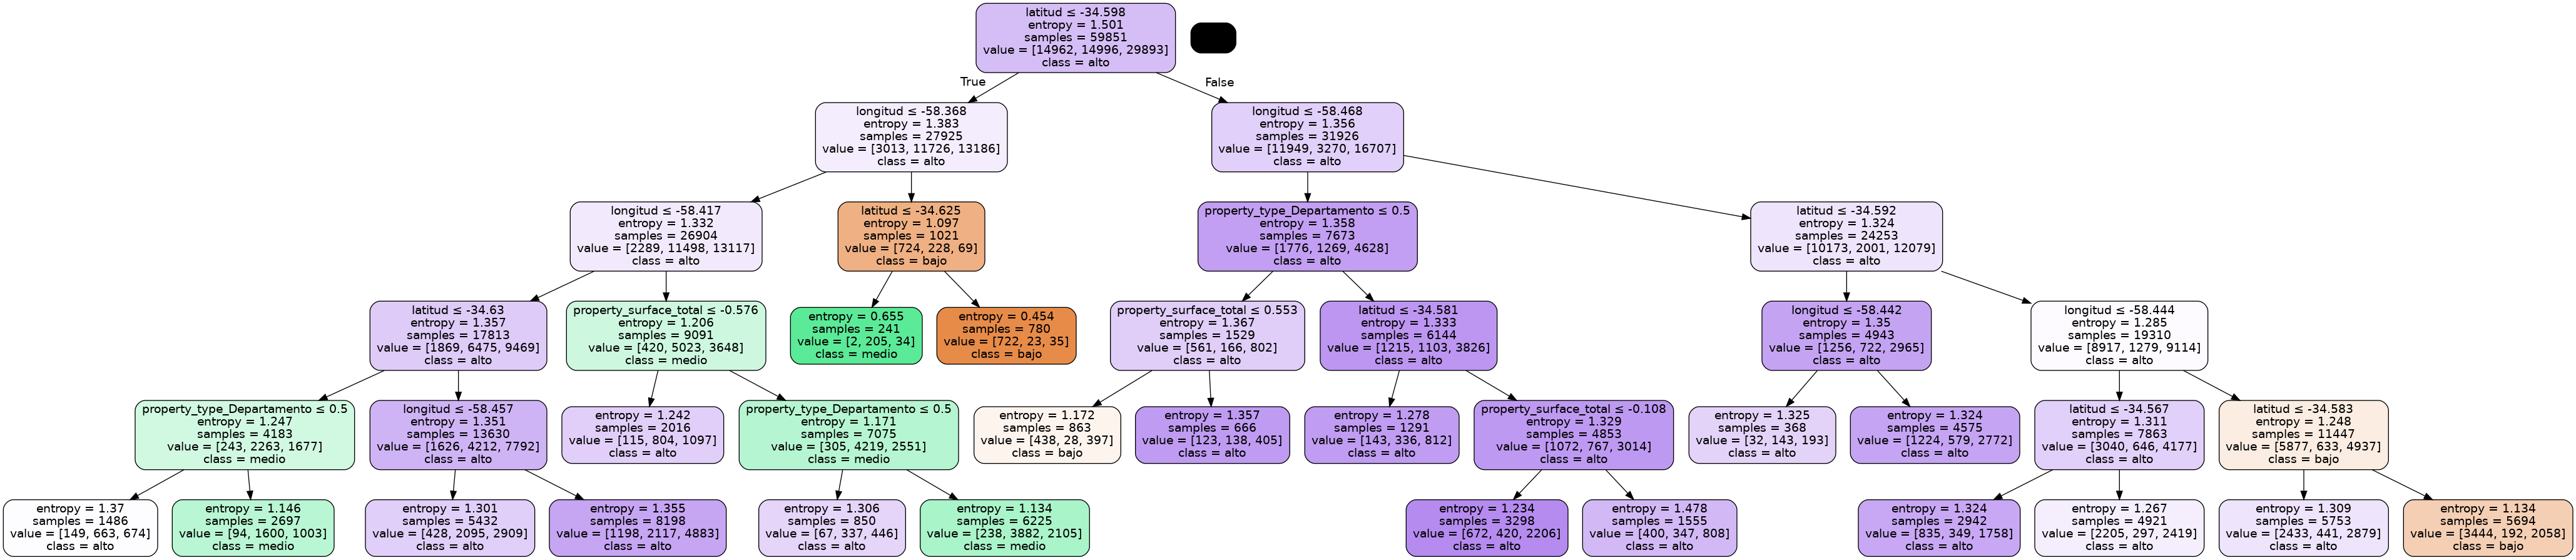

In [329]:
dot_data = StringIO()
export_graphviz(arbol_rf_normal, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features_normal,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Arbol de dataset reducido

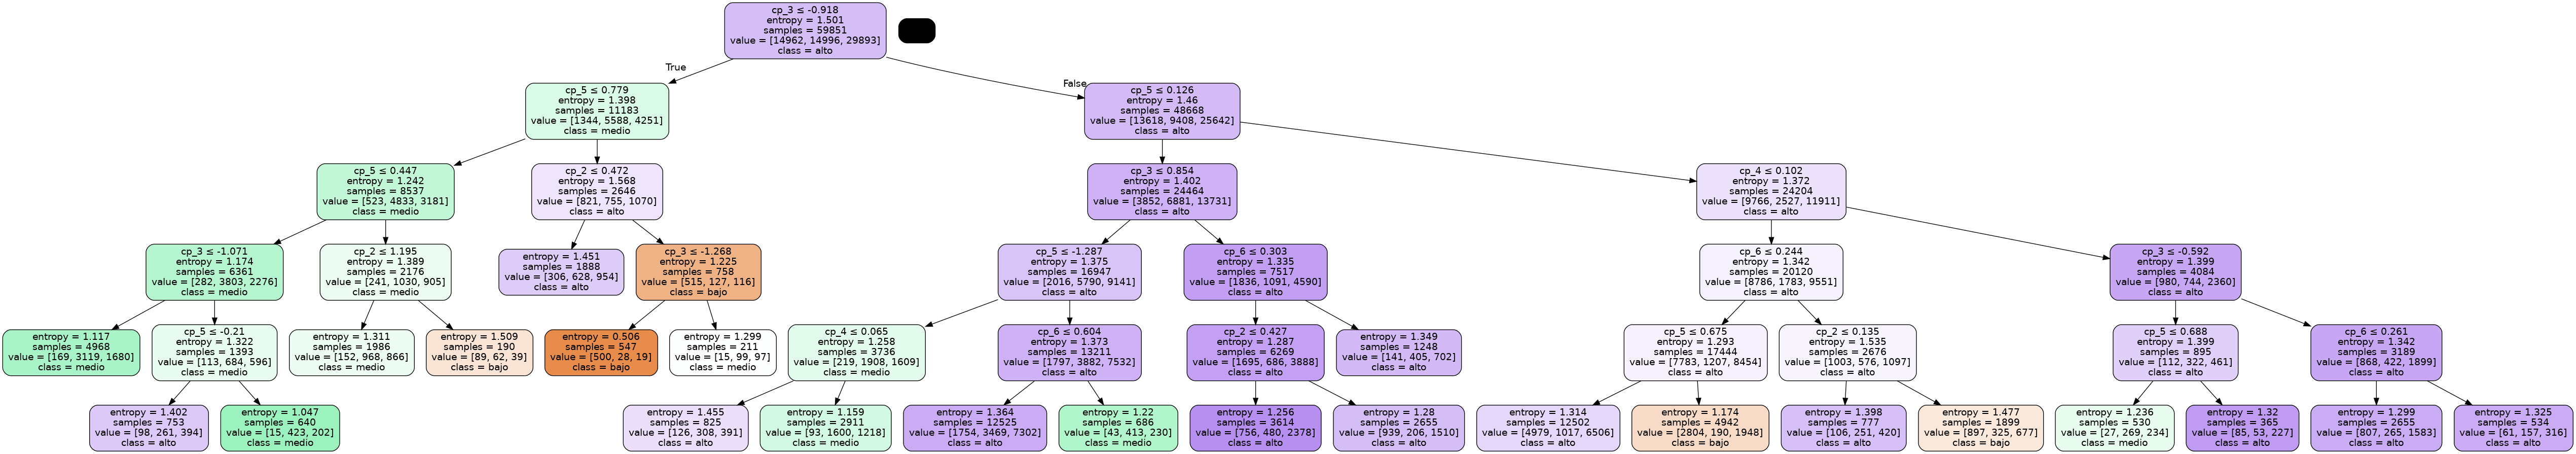

In [330]:
dot_data = StringIO()
export_graphviz(arbol_rf_reducido, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features_reducido,
                class_names=['bajo','medio','alto'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Explicacion 

Explicacion de como se clasifica una instancia:

- Empezamos en el nodo hoja donde le pregunta a la instancia si su latitud es menor o igual a -34.598, si lo es se va para la izquierda, de lo contrario para la derecha (suponemos que se va a la izquierda)
- En el segundo paso pregunta si la longitud es menor o igual a -58.365, si lo es se va a la izquierda
- Tercer paso vuelve a preguntar sobre la longotud, en este caso suponemos que se mueve a la derecha.
- Finalemnte en el ultimo nodo antes de ir a una hoja y ser clasificado, le pregunta a la instancia si su property_surface_covered es menor o igual -0,576, si lo es lo calsifica como alto, de lo contrario como bajo

Notar que cuanto mas naranja es el nodo, mas seguro esta de la decision que va a tomar

#### Evaluacion de los modelos

In [331]:
def evaluacion_de_modelos(ds_test_x, ds_test_y, arbol_rf):    
    #Hago predicción sobre el set de evaluacion
    y_pred = arbol_rf.predict(ds_test_x)

    #Arbol Reporte y Matriz de Confusion
    print(classification_report(ds_test_y, y_pred))
    print('F1-Score: {}'.format(f1_score(ds_test_y, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1

    cm = confusion_matrix(ds_test_y,y_pred)
    sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')

Dataset normal

              precision    recall  f1-score   support

        alto       0.63      0.30      0.40      4063
        bajo       0.61      0.37      0.46      4067
       medio       0.56      0.81      0.66      8132

    accuracy                           0.57     16262
   macro avg       0.60      0.49      0.51     16262
weighted avg       0.59      0.57      0.55     16262

F1-Score: 0.5734227032345345


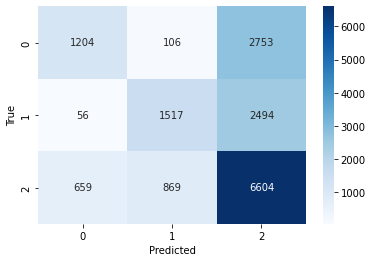

In [332]:
evaluacion_de_modelos(x_test, y_test, arbol_rf_normal)

- Podemos ver que con los datos de testeo el f1-score es muy parecido a lo que dio en los datos de entrenamiento. Esto es un indicio que el modelo no se overfiteo


Al igual que en los arboles de deciscion: 


- Notar que las clases clasificadas con el recall y f1-score mas bajo son los labels "alto" y "bajo", esto puede estar producido por el desbalanceamiento de datos que indicamos al principio.
- Mientras que el label "medio" es el mejor en ambas metricas. Y coincidentemente el que mas cantidad de registros con este label en el dataset

Dataset reducido

              precision    recall  f1-score   support

        alto       0.55      0.28      0.38      4063
        bajo       0.58      0.46      0.52      4067
       medio       0.56      0.76      0.65      8132

    accuracy                           0.57     16262
   macro avg       0.57      0.50      0.51     16262
weighted avg       0.57      0.57      0.55     16262

F1-Score: 0.5653056204648874


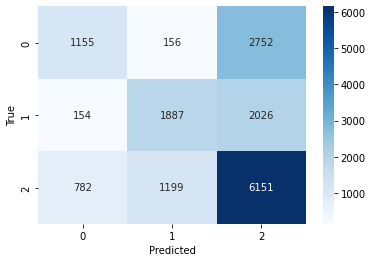

In [333]:
evaluacion_de_modelos(x_test_reducido, y_test_reducido, arbol_rf_reducido)

Al igual que lo redactado arriba:

- Podemos ver que con los datos de testeo el f1-score es muy parecido a lo que dio en los datos de entrenamiento. Esto es un indicio que el modelo no se overfiteo

- Notar que las clases clasificadas con el recall y f1-score mas bajo son los labels "alto" y "bajo", esto puede estar producido por el desbalanceamiento de datos que indicamos al principio.
- Mientras que el label "medio" es el mejor en ambas metricas. Y coincidentemente el que mas cantidad de registros con este label en el dataset


Persistimos el modelo

In [334]:
#filename = "random_forest_model_normal.sav"
#pickle.dump(arbol_rf_normal, open(filename, 'wb'))

#filename = "random_forest_model_reducido.sav"
#pickle.dump(arbol_rf_reducido, open(filename, 'wb'))


# K-Nearest Neighbors

### Optimzacion de parametros

In [335]:
def optimizar_parametros_knn(ds_train_x, ds_train_y): 

    #Grilla de Parámetros
    params_grid={ 'n_neighbors':range(1,30), 
                'weights':['distance','uniform'],
                'algorithm':['ball_tree', 'kd_tree', 'brute'],
                'metric':['euclidean','manhattan','chebyshev']
                }

    scorer_fn = make_scorer(f1_score, average='micro')

    #Clasificador KNN
    knn = KNeighborsClassifier()

    #Random Search con 10 Folds y 10 iteraciones
    rand = RandomizedSearchCV(knn, params_grid, scoring=scorer_fn, cv=10, n_iter=10, random_state=1)

    return rand.fit(ds_train_x, ds_train_y)

randcv_knn_normal = optimizar_parametros_knn(x_train, y_train)
randcv_knn_reducido = optimizar_parametros_knn(x_train_reducido, y_train_reducido)

/home/fanu/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/fanu/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/fanu/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/fanu/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

 - Utilizamos Random serch con 10 combinaciones
 - Para k-fold utilizamos 10 folds (mejor metrica que con 5 folds)
 - Para buscar los parametros consideramos la metrica f1-score

In [336]:
#Mejores hiperparametros del arbol
print("Para el dataset completo, obtuvimos que los mejores hiperparametros del arbol son: " + str(randcv_knn_normal.best_params_))
#Mejor métrica
print("Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: " + str(randcv_knn_normal.best_score_))

Para el dataset completo, obtuvimos que los mejores hiperparametros del arbol son: {'weights': 'distance', 'n_neighbors': 23, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: 0.6337071462485147


In [337]:
#Mejores hiperparametros del arbol
print("Para el dataset reducido, obtuvimos que los mejores hiperparametros del arbol son: " + str(randcv_knn_reducido.best_params_))
#Mejor métrica
print("Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: " + str(randcv_knn_reducido.best_score_))


Para el dataset reducido, obtuvimos que los mejores hiperparametros del arbol son: {'weights': 'distance', 'n_neighbors': 23, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
Y el f1-score que obtuvimos en el dataset completo para los datos de entrenamiento fue de: 0.6719687457869533


Ambos f1-score son muy similares, de nuevo en entrenamiento el modelo entrenado con el dataset reducido es levemente mejor.

Creo knn con los mejores parametros obtenidos

In [338]:
def crear_knn(randomcv_knn, ds_train_x, ds_train_y):

    knn = KNeighborsClassifier().set_params(**randomcv_knn.best_params_)
    knn.fit(ds_train_x, ds_train_y)
    return knn

knn_normal = crear_knn(randcv_knn_normal, x_train, y_train)
knn_reducido = crear_knn(randcv_knn_reducido, x_train_reducido, y_train_reducido)

/home/fanu/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/fanu/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Evaluacion de modelos

In [339]:
def evaluar_modelo_knn(ds_test_x, ds_test_y, knn):


    y_pred=knn.predict(ds_test_x)

    print('F1-Score: {}'.format(f1_score(ds_test_y, y_pred, average='micro'))) #binary considera la clase positiva por defecto 1
    #Reporte de Clasificación
    print(classification_report(ds_test_y,y_pred))

    #Matriz de Confusión
    cm = confusion_matrix(ds_test_y, y_pred)
    sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')

Modelo entrenado con dataset completo

F1-Score: 0.6889066535481491
              precision    recall  f1-score   support

        alto       0.69      0.60      0.65      4063
        bajo       0.71      0.59      0.64      4067
       medio       0.68      0.78      0.73      8132

    accuracy                           0.69     16262
   macro avg       0.69      0.66      0.67     16262
weighted avg       0.69      0.69      0.69     16262



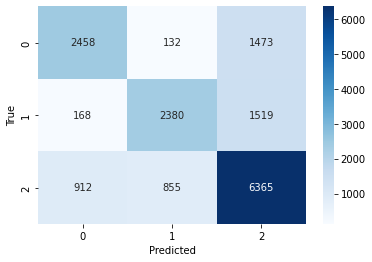

In [340]:
evaluar_modelo_knn(x_test, y_test, knn_normal)

- Se puede observar como en modelos anteriores que el f1-score da buenos resultados en train y test, aca inclusive tiene mejor metrica en test. Gran indicador que no esta overfiteado.
- Este modelo de knn tiene la particularidad de que en las metricas de recall, precision y f1 tiene scores similares y relativamente altas en todos los labels, situacion que no ocurrio con arboles de decision y random forest.


Modelo entrenado con dataset reducido

F1-Score: 0.72672488008855
              precision    recall  f1-score   support

        alto       0.74      0.66      0.69      4063
        bajo       0.77      0.63      0.70      4067
       medio       0.71      0.81      0.75      8132

    accuracy                           0.73     16262
   macro avg       0.74      0.70      0.71     16262
weighted avg       0.73      0.73      0.72     16262



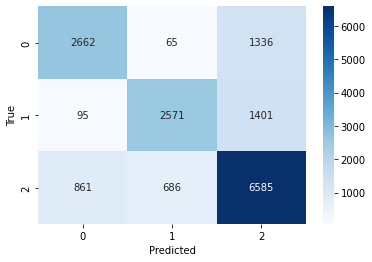

In [341]:
evaluar_modelo_knn(x_test_reducido, y_test_reducido, knn_reducido)

- Al igual que el modelo de knn entrenado con el dataset completo, se observa un leve mejoramiento en f1-score con los datos de prueba, esto indica que el modelo no esta overfiteado
- Tambien muestra buenas metricas de recall, precision y f1 en todos los labels, a diferencia de los modelos anterioires

Persistimos el modelo

In [342]:
#filename = "knn_model_normal.sav"
#pickle.dump(knn_normal, open(filename, 'wb'))

#filename = "knn_model_reducido.sav"
#pickle.dump(knn_reducido, open(filename, 'wb'))

### Conclusiones

- Claramente si tuviera que elegir un modelo seria el de KNN, su superioridad en las metricas de prueba y testeo son bastante notables.
- Tambien cabe resaltar que su desempeno con todos los labels es relativamente bueno, a diferencia del resto de los modelos que estudiamos